# <font color = 'green'>Pandas - II</font>
## Source:
 - Book: [McKinney | (p 98 / 529)]
 - Book: [Nelli | (p 69 / 576)]
 
## Topics:
 - [Part II: Pandas Data Preparation](#Part-I:-Pandas-Data-Preparation)

# <font color = 'green'>Part II: Pandas Data Preparation</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Program to generate a m x n DataFrame with random NaN values scattered in:
def df_maker(m, n): 
    df = pd.DataFrame(np.random.randint(1, 100, (m*n)).reshape(m, n), index = [f'Row {i+1}' for i in range(m)], columns = [f'Col {j+1}' for j in range(n)] )
    for i in range(m):
        df.iloc[[i],[random.randrange(n)]] = np.nan
    return df
df = df_maker(10, 10) 
df

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10
Row 1,8.0,91.0,98.0,64.0,61,31,NaN,49.0,55.0,25
Row 2,41.0,52.0,27.0,NaN,9,23,56.0,2.0,94.0,20
Row 3,99.0,NaN,67.0,40.0,89,36,26.0,34.0,59.0,49
Row 4,NaN,72.0,80.0,44.0,37,21,62.0,40.0,74.0,21
Row 5,1.0,6.0,NaN,80.0,16,68,28.0,21.0,74.0,20
Row 6,42.0,12.0,34.0,43.0,74,70,92.0,63.0,NaN,6
Row 7,88.0,93.0,20.0,75.0,56,58,76.0,45.0,NaN,73
Row 8,61.0,62.0,42.0,29.0,92,77,NaN,61.0,78.0,8
Row 9,15.0,37.0,59.0,33.0,55,54,36.0,NaN,77.0,80
Row 10,NaN,59.0,2.0,74.0,87,11,29.0,31.0,49.0,88


# <font color = 'green'>1. Handling Missing Data</font>

The methods of handling missing data in Pandas:
 - The <code>isnull()</code> method
 - The <code>notnull()</code> method
 - The <code>dropna()</code> method
 - The <code>fillna()</code> method

## <font color = 'blue'>1.1 Handling Missing Data: <code>isnull()</code> and <code>notnull()</code></font>:

In [3]:
df.isnull().head()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10
Row 1,False,False,False,False,False,False,True,False,False,False
Row 2,False,False,False,True,False,False,False,False,False,False
Row 3,False,True,False,False,False,False,False,False,False,False
Row 4,True,False,False,False,False,False,False,False,False,False
Row 5,False,False,True,False,False,False,False,False,False,False


In [4]:
df.notnull().head()

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10
Row 1,True,True,True,True,True,True,False,True,True,True
Row 2,True,True,True,False,True,True,True,True,True,True
Row 3,True,False,True,True,True,True,True,True,True,True
Row 4,False,True,True,True,True,True,True,True,True,True
Row 5,True,True,False,True,True,True,True,True,True,True


## <font color = 'blue'>1.2 Filtering Missing Data: <code>dropna()</code></font>:

### Python | Pandas <code>DataFrame.dropna()</code>

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Sometimes csv file has null values, which are later displayed as NaN in Data Frame. Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways.

#### Syntax:

<code>DataFrameName.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)</code>

#### Parameters:

 - <code>axis</code>: axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String.
 - <code>how</code>: how takes string value of two kinds only (‘any’ or ‘all’). ‘any’ drops the row/column if ANY value is Null and ‘all’ drops only if ALL values are null.
 - <code>thresh</code>: thresh takes integer value which tells minimum amount of na values to drop.
 - <code>subset</code>: It’s an array which limits the dropping process to passed rows/columns through list.
 - <code>inplace</code>: It is a boolean which makes the changes in data frame itself if True.
 
Source: [pandas DataFrame.<code>dropna()</code>](https://www.geeksforgeeks.org/python-pandas-dataframe-dropna/)

### Filling all NaN Values
### Python | Pandas DataFrame.fillna() to replace Null values in dataframe

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages, and makes importing and analyzing data much easier.

Sometimes <code>csv</code> file has null values, which are later displayed as NaN in Data Frame. Just like pandas dropna() method manage and remove Null values from a data frame, <code>fillna()</code> manages and let the user replace NaN values with some value of their own.
Syntax:

<code>DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)</code>

#### Parameters:

 - <code>value</code> : Static, dictionary, array, series or dataframe to fill instead of NaN.
 - <code>method</code> : Method is used if user doesn’t pass any value. Pandas has different methods like bfill, backfill or ffill which fills the place with value in the Forward index or Previous/Back respectively.
 - <code>axis</code>: axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String
 - <code>inplace</code>: It is a boolean which makes the changes in data frame itself if True.
 - <code>limit</code> : This is an integer value which specifies maximum number of consequetive forward/backward NaN value fills.
 - <code>downcast</code> : It takes a dict which specifies what dtype to downcast to which one. Like Float64 to int64.
 - <code>**kwargs</code> : Any other Keyword arguments

Source: [pandas DataFrame.<code>fillna()</code>](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/)

In [5]:
df.dropna(axis = 1)

,Col 5,Col 6,Col 10
Row 1,61,31,25
Row 2,9,23,20
Row 3,89,36,49
Row 4,37,21,21
Row 5,16,68,20
Row 6,74,70,6
Row 7,56,58,73
Row 8,92,77,8
Row 9,55,54,80
Row 10,87,11,88


## <font color = 'blue'>1.3 Filling in Missing Data: <code>fillna()</code></font>:

In [6]:
df.apply(lambda x: x.fillna(x.mean()),axis=1).round(0)

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10
Row 1,8.0,91.0,98.0,64.0,61.0,31.0,54.0,49.0,55.0,25.0
Row 2,41.0,52.0,27.0,36.0,9.0,23.0,56.0,2.0,94.0,20.0
Row 3,99.0,55.0,67.0,40.0,89.0,36.0,26.0,34.0,59.0,49.0
Row 4,50.0,72.0,80.0,44.0,37.0,21.0,62.0,40.0,74.0,21.0
Row 5,1.0,6.0,35.0,80.0,16.0,68.0,28.0,21.0,74.0,20.0
Row 6,42.0,12.0,34.0,43.0,74.0,70.0,92.0,63.0,48.0,6.0
Row 7,88.0,93.0,20.0,75.0,56.0,58.0,76.0,45.0,65.0,73.0
Row 8,61.0,62.0,42.0,29.0,92.0,77.0,57.0,61.0,78.0,8.0
Row 9,15.0,37.0,59.0,33.0,55.0,54.0,36.0,50.0,77.0,80.0
Row 10,48.0,59.0,2.0,74.0,87.0,11.0,29.0,31.0,49.0,88.0


## <font color = 'blue'>2. Pandas Data Transformation</font>

### 2.1 Duplicate Rows: the <code>duplicated()</code> and <code>drop_duplicates()</code> Methods

Both of these methods by default consider all of the columns; alternatively, you can
specify any subset of them to detect duplicates. 

In [7]:
import random

Car_List = list('Honda Suzuki Mercedez Audi Jaguar'.split())
Colour_List = list('White Black Red Blue Green Yellow'.split())

def cars(n):
    cars = []
    colours = []
    for i in range(n):
        cars.append(random.choice(Car_List))
        colours.append(random.choice(Colour_List))
    return cars, colours

name = cars(10)[0]
colours = cars(10)[1]

data = {
    'Name': name,
    'Colour': colours,
    'Price': (np.random.randint(15, 25, 10))*1000
}

df = pd.DataFrame(data)
df

,Name,Colour,Price
0,Suzuki,Black,22000
1,Audi,White,16000
2,Suzuki,Black,20000
3,Audi,Red,21000
4,Suzuki,Red,24000
5,Honda,White,19000
6,Jaguar,Green,15000
7,Mercedez,Yellow,17000
8,Honda,Green,15000
9,Audi,Black,22000


In [8]:
# Suppose we had an additional column of values and wanted to filter duplicates only based on the 'Name' column:
df.drop_duplicates(['Name'])

,Name,Colour,Price
0,Suzuki,Black,22000
1,Audi,White,16000
5,Honda,White,19000
6,Jaguar,Green,15000
7,Mercedez,Yellow,17000


In [9]:
# duplicated and drop_duplicates by default keep the first observed value combination. Passing keep='last' will return the last one:

df.drop_duplicates(['Name'], keep = 'last')

,Name,Colour,Price
4,Suzuki,Red,24000
6,Jaguar,Green,15000
7,Mercedez,Yellow,17000
8,Honda,Green,15000
9,Audi,Black,22000


### 2.2 Transforming Data Using a Function or Mapping: The <code>map(..)</code> method:

In [10]:
name = [x for x in df['Name']]
commission = np.random.uniform(0.05, 0.1, 10).round(2)
car_commission = dict(zip(name, commission))
car_commission

{'Suzuki': 0.07, 'Audi': 0.05, 'Honda': 0.07, 'Jaguar': 0.1, 'Mercedez': 0.08}

In [11]:
# The map method on a Series accepts a function or dict-like object containing a mapping
df['Commission'] = df['Name'].map(car_commission)
df

,Name,Colour,Price,Commission
0,Suzuki,Black,22000,0.07
1,Audi,White,16000,0.05
2,Suzuki,Black,20000,0.07
3,Audi,Red,21000,0.05
4,Suzuki,Red,24000,0.07
5,Honda,White,19000,0.07
6,Jaguar,Green,15000,0.10
7,Mercedez,Yellow,17000,0.08
8,Honda,Green,15000,0.07
9,Audi,Black,22000,0.05


## <font color = 'blue'>2.3. Replacing Values</font>

Filling in missing data with the fillna method is a special case of more general value
replacement. As you’ve already seen, <code>map()</code> can be used to modify a subset of values in
an object but <code>replace</code> provides a simpler and more flexible way to do so. Let’s consider
this Series:

In [12]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [13]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [14]:
# If you want to replace multiple values at once, you instead pass a list and then the substitute value:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [15]:
# The argument passed can also be a dict:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## <font color = 'blue'>2.4. Renaming Axis Indexes</font>

Like values in a Series, axis labels can be similarly transformed by a function or mapping
of some form to produce new, differently labeled objects. You can also modify
the axes in-place without creating a new data structure. Here’s a simple example:

In [16]:
df
transform = lambda x: x + 1
df.index = df.index.map(transform)
df

,Name,Colour,Price,Commission
1,Suzuki,Black,22000,0.07
2,Audi,White,16000,0.05
3,Suzuki,Black,20000,0.07
4,Audi,Red,21000,0.05
5,Suzuki,Red,24000,0.07
6,Honda,White,19000,0.07
7,Jaguar,Green,15000,0.10
8,Mercedez,Yellow,17000,0.08
9,Honda,Green,15000,0.07
10,Audi,Black,22000,0.05


In [17]:
df.rename(columns = str.upper)

,NAME,COLOUR,PRICE,COMMISSION
1,Suzuki,Black,22000,0.07
2,Audi,White,16000,0.05
3,Suzuki,Black,20000,0.07
4,Audi,Red,21000,0.05
5,Suzuki,Red,24000,0.07
6,Honda,White,19000,0.07
7,Jaguar,Green,15000,0.10
8,Mercedez,Yellow,17000,0.08
9,Honda,Green,15000,0.07
10,Audi,Black,22000,0.05


## <font color = 'blue'>2.5. Discretization and Binning</font>

In [18]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Age Desciption:
Age(min) : 18
Q1     : 27.0
Q2     : 39.0
Q3     : 51.0
Age(max) : 64


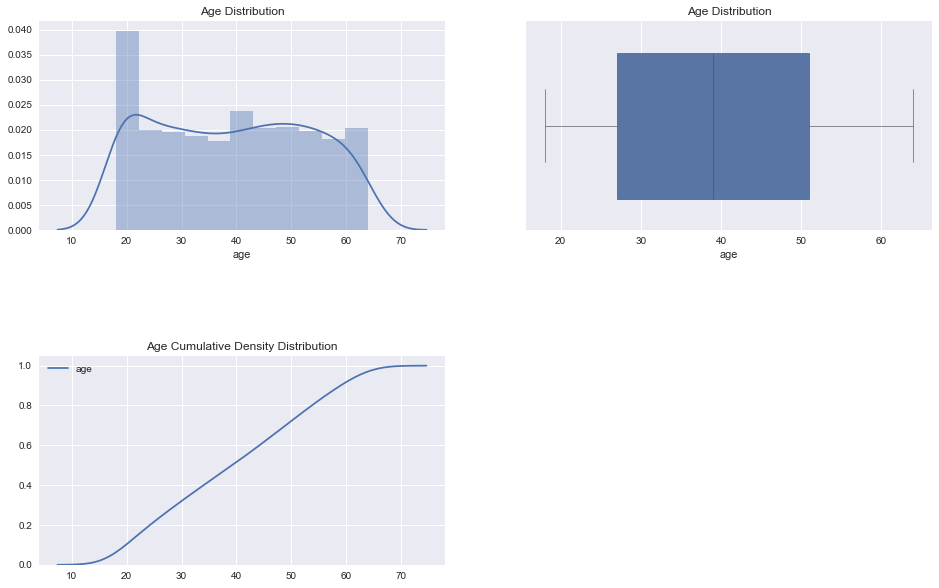

In [20]:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'{x.capitalize()} Desciption:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1     : {Q1}\n'
          f'Q2     : {Q2}\n'
          f'Q3     : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    plt.subplot(221)
    ax1 = sns.distplot(data[x])
    plt.title(f'{x.capitalize()} Distribution')
    plt.subplot(222)
    ax2 = sns.boxplot(x=data[x], width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Distribution')
    plt.subplot(223)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    plt.show()
    
summary('age')

In [21]:
# Normal Bins:
age = data['age']
bins = [18, 25, 35, 60, 100]
group_names = ['Youth', 'Adult', 'MiddleAged', 'Senior']
cats = pd.cut(age, bins, right = False, labels = group_names)
cats

0            Youth
1            Youth
2            Adult
3            Adult
4            Adult
           ...    
1333    MiddleAged
1334         Youth
1335         Youth
1336         Youth
1337        Senior
Name: age, Length: 1338, dtype: category
Categories (4, object): [Youth < Adult < MiddleAged < Senior]

In [22]:
type(cats)

pandas.core.series.Series

In [23]:
cats.values.unique()

[Youth, Adult, MiddleAged, Senior]
Categories (4, object): [Youth < Adult < MiddleAged < Senior]

In [24]:
pd.value_counts(cats)

MiddleAged    675
Youth         278
Adult         271
Senior        114
Name: age, dtype: int64

In [25]:
# Quantile Bins:
qcats = pd.qcut(age, 4, labels = ['First', 'Second', 'Third', 'Fourth'])
qcats

0        First
1        First
2       Second
3       Second
4       Second
         ...  
1333     Third
1334     First
1335     First
1336     First
1337    Fourth
Name: age, Length: 1338, dtype: category
Categories (4, object): [First < Second < Third < Fourth]

In [26]:
pd.value_counts(qcats)

First     362
Third     337
Fourth    327
Second    312
Name: age, dtype: int64